### LANNELONGUE Vincent – GATIN Juliette

# Projet numérique : choix du pas de temps 

## Pas fixe

***Imports préalables :***

In [47]:
import numpy as np
import matplotlib.pyplot as plt

 ***Euler explicit pour un pas de temps fixe, dt :***

Schéma d'Euler explicit – $x^{j+1} = x^j + dt * f(t_{j}, x^j)$

In [64]:
def solve_euler_explicit(f, dt, tf, x0, t0 = 0): 
    t, x = [t0], [x0]
    while t[-1] < tf :
        x.append(x[-1] + dt * f(t[-1], x[-1]))
        t.append(t[-1] + dt)
    return t, x

***Une équation différentielle à tester :***

On considère $\dot{x} = x$ avec ($t_{0} = 0, x_{0}$ = 1) dont la solution est $x \mapsto exp(x)$

In [53]:
def f(t, x):
    return x

Affichage :

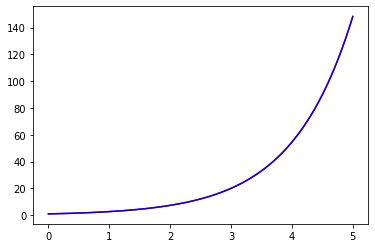

In [109]:
t0, x0 = 0, 1
tf = 5
dt = 0.001

t, x = solve_euler_explicit(f, dt, tf, x0 , t0)
sol = [np.exp(temps) for temps in t]

plt.plot(t, sol, color = 'red') #tracé théorique 
plt.plot(t, x, color = 'blue')

plt.show()

### Mise en évidence de la convergence du schéma à l'ordre 1

**Calcul de l'erreur :** on considère $max\parallel x^j - x(t_{j}) \parallel$

In [78]:
def ecart_max(u, f, f_sol, dt, tf, x0, t0 = 0):
    t, x = u(f, dt, tf, x0, t0 = 0)
    e = []
    for i, temp in enumerate(t):
        e.append(abs(x[i] - f_sol(temp)))
    return max(e)

Générons une liste $pas$, contenant différents pas de temps.
Puis, traçons l'évolution de l'erreur maximale $e$ en fonction du pas de temps $dt$ : 

Pour l'exemple 1, on a : 

In [90]:
pas = np.arange(0.001, 0.1, 0.001)
f_sol = np.exp

e_11 = []
for dt in pas:
    e_11.append(ecart_max(solve_euler_explicit, f, f_sol, dt, 10, 1))

Vérifions la convergence du schéma à l'ordre 1 : visuellement, on s'attend à ce que l'évolution de l'erreur maximale $e$ soit proportionnelle à l'évolution du pas de temps $dt$

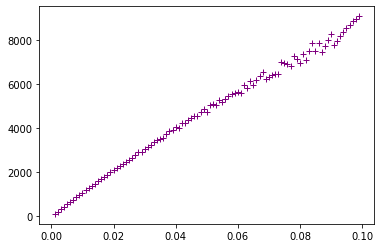

In [91]:
plt.plot(pas, e_11, '+', color = 'purple')
plt.show()

**Remarque :** la convergence à l'ordre 1 est bien vérifiée pour des pas de temps faibles mais plus celui-ci augmente, plus on s'écarte de la linéarité attendue.

***Heun explicit pour un pas de temps fixe, dt :***

Schéma de Heun explicit – $x^{j+1} = x^j + \frac{dt}{2} * (f(t_{j}, x^j) + f(t_{j+1}, x^j + dt * f(t_{j}, x^j))$

In [63]:
def solve_heun_explicit(f, dt, tf, x0, t0 = 0):
    t, x = [t0, t0 + dt], [x0]
    i = 0
    while t[-1] < tf:
        x.append(x[-1] + dt/2 * (f(t[i], x[-1]) + f(t[i+1], x[-1] + dt * f(t[i], x[-1]))))
        t.append(t[-1] + dt)
        i += 1
    return t[:-1], x

Affichage pour l'exemple 1:

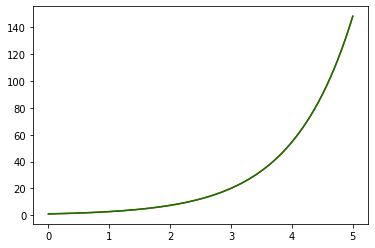

In [110]:
x0 = 1
tf = 5

t, x = solve_heun_explicit(f, 0.001, tf, x0 , t0 = 0)
sol = [np.exp(temps) for temps in t]

plt.plot(t, sol, color = 'red') #tracé théorique
plt.plot(t, x, color = 'green')

plt.show()

Comparons les deux méthodes avec en ${\color{red}{rouge}}$, le tracé théorique; en ${\color{green}{vert}}$, le tracé du schéma d'ordre 1 (Euler explicit) et en ${\color{blue}{bleu}}$, le tracé du schéma d'ordre 2.

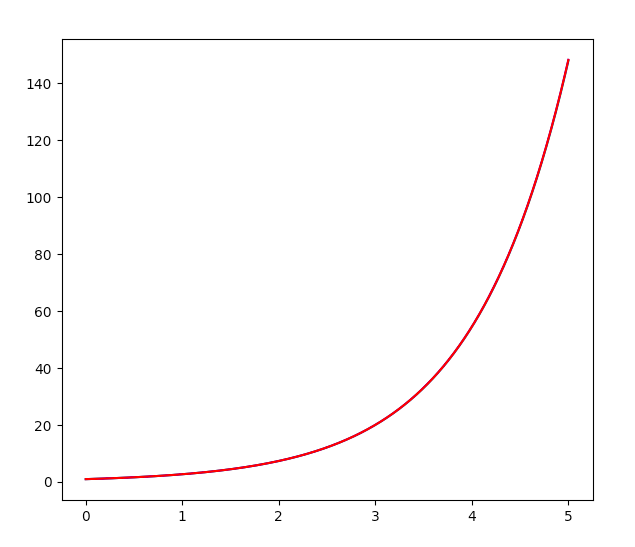

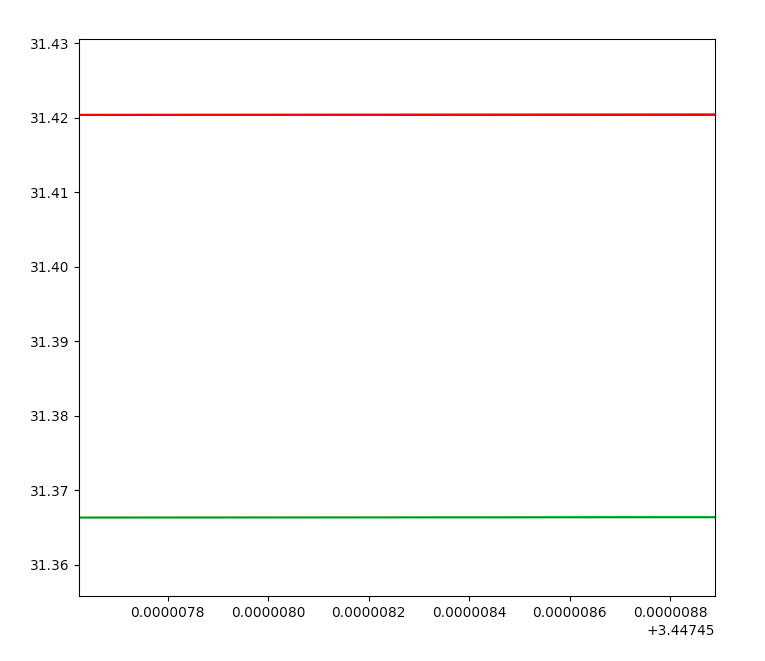

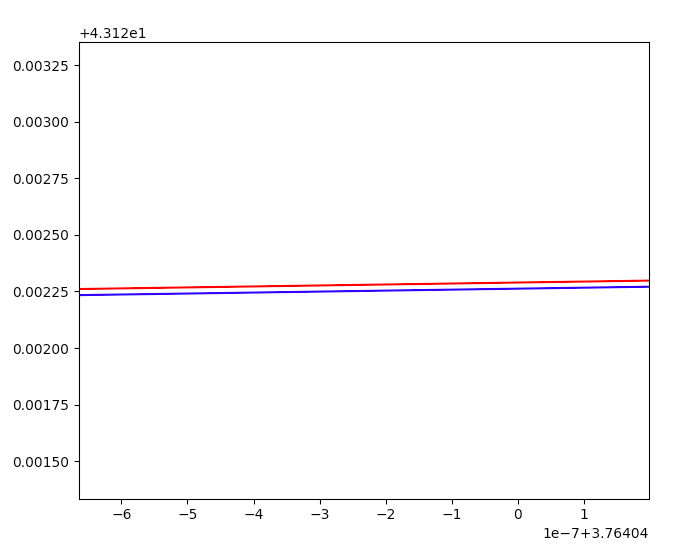

**Remarques :** le tracé du schéma d'ordre 2 (${\color{blue}{bleu}}$) est effectivement bien plus précis que celui d'ordre 1 (${\color{green}{vert}}$).

### Mise en évidence de la convergence du schéma à l'ordre 2

Vérifions la convergence du schéma à l'ordre 2 : visuellement, on s'attend à ce que l'évolution de l'erreur maximale $e$ soit quadratique par rapport à l'évolution du pas de temps $dt$

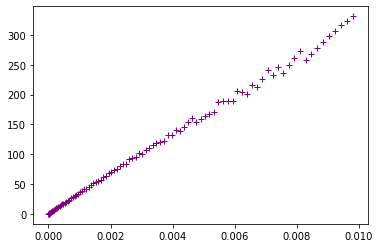

In [15]:
pas = np.arange(0.001, 0.1, 0.001)

e_2 = []
for dt in pas:
    e_2.append(ecart_max(solve_heun_explicit, f, dt, 10, 1))


plt.plot(pas**2, e_2, '+', color = 'purple')
plt.show()

**Observation :** la convergence à l'ordre 2 semble être vérifiée. En effet, on observe bien une évolution quadratique de l'erreur en le pas de temps : le tracé de $e = f(dt^2)$ est bien linéaire.

## Adaptation du pas de temps

Supposons $f$ $C^1$, montrons que pour un schéma d'Euler explicit, on a :

$$\left\|e^{j+1}\right\|=\Delta t_{j} \frac{\left\|f\left(t_{j+1}, x^{j+1}\right)-f\left(t_{j}, x^{j}\right)\right\|}{2}+O\left(\Delta t_{j}^{3}\right)$$

De fait, on pourra estimer à chaque itération l'erreur commise $e^{j+1}$ et adpater le pas selon si celle-ci est inférieure ou supérieure au seuil de tolérance. 

***Démonstration :***

D'une part, on a par définition de l'erreur locale dûe à l'approximation de l'intégrale : $$ e^{j+1} = \tilde{x}(t_{j+1}) -x^{j+1} = \left(x^j + \int_{t_j}^{t_{j+1}} f(s,\tilde{x}(s))ds\right) $$ 

avec ${\tilde {x}}$ solution de $\dot{x}=f(x)$ et ${\tilde {x}}(t_{j})=x^j$.

De plus, le schéma d'Euler explicit donne: $x^{j+1} = x^j + \Delta t_j  f(t_j,x^j) $ . 

Or, $\int_{t_j}^{t_{j+1}} f(s,\tilde{x}(s))ds = \frac{f(t_{j+1},\tilde{x}(t_{j+1})) + f(t_{j},\tilde{x}(t_{j}))}{2} \Delta t_{j} + O(\Delta t_j^2)$ $(1)$

Remplaçons $\tilde{x}(t_{j})$ par $x^j$ et $\tilde{x}(t_{j+1})$ par $x^{j+1}$:

Par définition, on a : $\tilde{x}(t_{j})) = x_{j}$ 

Et, en effectuant un développement de Taylor à l'ordre 2 car $f$ est $C^1$ donc $\tilde{x}$ est $C^2$, on a:

\begin{aligned}
\tilde{x}\left(t_{j+1}\right) &=\tilde{x}\left(t_{j}\right)+\Delta t_{j} \tilde{x}^{\prime}(t_{j})+\tilde{x}^{\prime \prime}\left(t_{j}\right) \frac{\Delta t_{j}^{2}}{2} \\
&=x^j +\Delta t_{j} f\left(t_{j}, x^{j}\right)+O\left(\Delta t_{j}^{2}\right)
\end{aligned}

Soit, comme on utilise Euler explicit : $ \tilde{x}(t_{j+1})) = x_{j+1} + O(\Delta t_j^2)$

Ainsi, $ \tilde{x}(t_{j+1})) - x_{j+1} = O(\Delta t_j^2)$

Et, $ f(t_{j+1}, \tilde{x}(t_{j+1})) = f(t_{j+1}, x^{j+1})+\partial_{x}f(t_{j+1}, x^{j+1})(\tilde{x}(t_{j+1})-x^{j+1})+ O(\tilde{x}(t_{j+1})-x^{j+1})$


Ie $ f(t_{j+1}, \tilde{x}(t_{j+1}))= f(t_{j+1}, x^{j+1})+O(\Delta t_{j}^{2}).
$

D'où, en utilisant $(1)$ et en injectant dans la définition de $e_{j+1}$, on a le résultat voulu : 

$$ e_{j+1}= \frac{f(t_{j+1},\tilde{x}(t_{j+1})) + f(t_{j},\tilde{x}(t_{j}))}{2} \Delta t_{j} + O(\Delta t_j^2)$$

Montrons de plus que $e^{j+1} = O(\Delta t_j^2)$ :

***Démonstration :***

De fait, une possible stratégie d'adaptation serait donc de prendre: 
$$\Delta t_{new} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{\left\|e^{j+1}\right\|}} $$ 
En effet : 

***Démonstration :***

***Explicitons et illustrons le fonctionnement du solveur proposé:***

Comme expliqué, la fonction suivante code un schéma d'Euler explicite à pas variable : l'erreur commise est estimée à chaque itération et le pas de temps adapté de façon à garder cette erreur en dessous d'un seuil. Le pas reste compris entre $dt_{min}$ et $dt_{max}$ fixés par l'utilisateur et sort la solution échantillonnée à $dt_{max}$. 

Justifions l'intérêt d'une telle méthode à pas de temps variable plutôt qu'un pas de fixe comme nous avions initiallement:

????